In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
X_main = pd.read_csv('clustering.csv')

In [3]:
X_main.head()

,repo_id,parent_id,depth,hf_parent_id,hf_depth,is_hard_fork,age,stars,forks,forks_active,...,pr_family_mentioned,new_jaccard,commit_count,activity,is_hf_parent,all,three,seven,nine,one_commit
0,209514,147,1,NaN,NaN,0,2517,9,2,0,...,NaN,0.914894,18,Long-Heavy,NaN,Hard,Social,Social,Social,Hard
1,269833,147,1,NaN,NaN,0,2633,0,0,0,...,NaN,0.904762,4,Long-Low,NaN,Hard,Social,Social,Social,Hard
2,278435,147,1,NaN,NaN,0,2480,0,1,0,...,NaN,0.911111,14,Long-Low,NaN,Hard,Social,Social,Social,Hard
3,306601,147,1,NaN,NaN,0,2689,0,1,0,...,NaN,0.902439,38,Long-Heavy,NaN,Social,Social,Social,Social,Hard
4,331355,147,1,NaN,NaN,0,2854,0,0,0,...,NaN,0.911111,20,Long-Heavy,NaN,Social,Social,Social,Social,Social


[0 1]
[1196 2117]


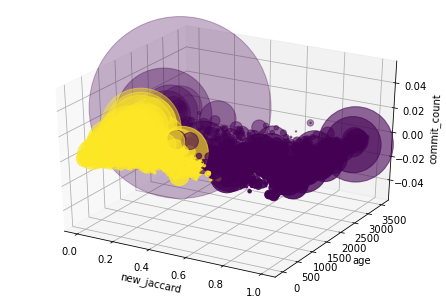

In [5]:
metric = "age"
metric2 = "commit_count"

X = pd.DataFrame(X_main, columns=[metric,metric2,"new_jaccard"])

X2 = pd.DataFrame(preprocessing.scale(X, with_mean=False))
X2.columns = X.columns
X=X2

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

pd.DataFrame(kmeans.labels_).to_csv('kmean_labels.csv')

(unique, counts) = np.unique(kmeans.labels_, return_counts=True)
print(unique)
print(counts)

fig = plt.figure()
ax = Axes3D(fig)

plt.scatter(X_main['new_jaccard'],X_main[metric],X_main[metric2], c=kmeans.labels_,)#, cmap='rainbow')
plt.xlabel('new_jaccard')
plt.ylabel(metric)
ax.set_zlabel(metric2)
plt.show()

[0 1 2]
[1268 2012   32]


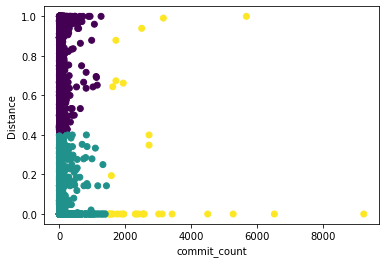

In [6]:
kmeans.cluster_centers_

array([[0.24646098, 1.4430104 ],
       [3.52463318, 3.05281071],
       [0.25955524, 2.70292554],
       [0.39305021, 0.37821596],
       [1.68301993, 0.94608805],
       [4.07079374, 0.98930589]])

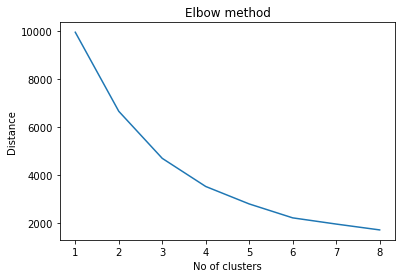

In [39]:
Distances =[]
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Distances.append(kmeans.inertia_)
plt.plot(range(1, 9), Distances)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Distance')
plt.show()